In [4]:
from statistics import mean
import numpy as np

In [2]:
xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

In [7]:
def best_fit_slope(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs**2)))
    return m

In [4]:
m = best_fit_slope(xs,ys)
print(m)

0.29999999999999893


 Best Fit Line 

In [9]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

In [6]:
m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)

0.29999999999999893 4.300000000000003


In [7]:
regression_line = [(m*x)+b for x in xs]

In [11]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

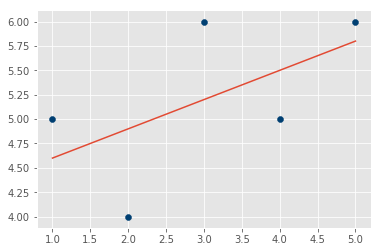

In [9]:
plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line)
plt.show()

predict

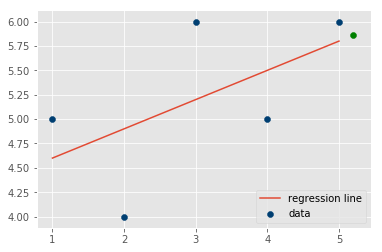

In [12]:
predict_x = 5.2
predict_y = (m*predict_x)+b

plt.scatter(xs,ys,color='#003F72',label='data')
plt.scatter(predict_x,predict_y,color='g')
plt.plot(xs, regression_line, label='regression line')
plt.legend(loc=4)
plt.show()

R Squared

In [13]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))


In [19]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [20]:
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

0.3214285714285714


Testing Assumptions

In [1]:
import random

In [2]:
def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step

    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

In [5]:
xs, ys = create_dataset(40,40,2,correlation='pos')

In [10]:
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]

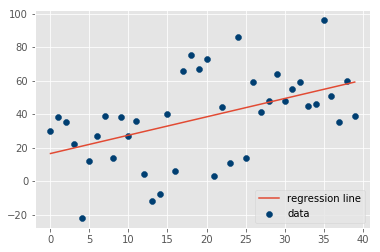

In [12]:
plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()

In [13]:
xs, ys = create_dataset(40,10,2,correlation='neg')

In [14]:
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]

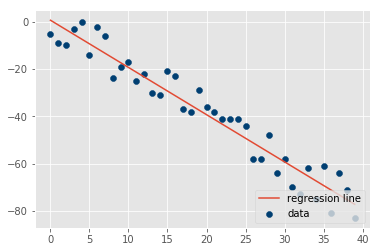

In [15]:
plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()